# ARIMA(2,1,2)

$$ Y'(n) - \mu = \phi(1)Y(n-1) + \phi(2)Y(n-2) + \theta(1) \epsilon(n-1) + \theta(2)\epsilon(n-2) + \epsilon(n) $$
$$ Y(n) = Y(n) - Y(n-1) $$

Simulate time series

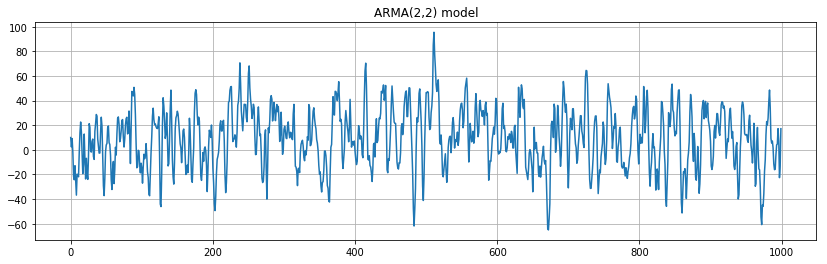

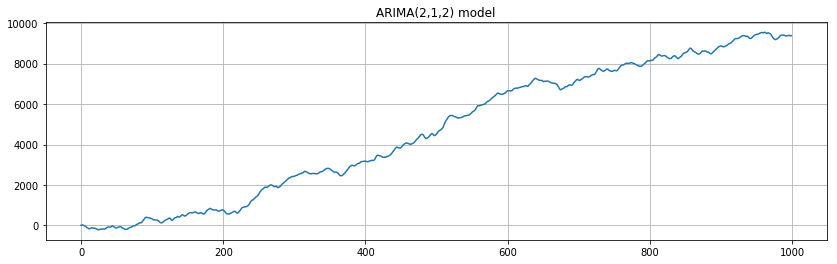

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
SIGMA_EPS = 10
THETA = [0.9, 0]
PHI = [0.7, 0]
MU = 10

epsilon = np.random.normal(scale=SIGMA_EPS, size=(N,))
Yp = np.ones((N,))*MU
for n in range(1,len(epsilon)):
    Yp[n] = MU + PHI[0]*(Yp[n-1] - MU) + PHI[1]*(Yp[n-2] - MU) + THETA[0]*epsilon[n-1] + THETA[1]*epsilon[n-2] + epsilon[n]
plt.figure(figsize=(14,4))
plt.plot(Yp)
plt.title('ARMA(2,2) model')
plt.grid()

Y = Yp.cumsum()
plt.figure(figsize=(14,4))
plt.plot(Y)
plt.title('ARIMA(2,1,2) model')
plt.grid()
plt.show()

## Autocorrelation function (ACF)

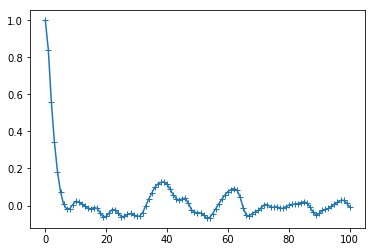

In [20]:
from statsmodels.tsa.stattools import acf

acf_sm, qstat, pval = acf(Yp, nlags=100, qstat=True)
plt.plot(acf_sm, '-+')
plt.show()


## Model Estimation

In [21]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Yp, (1,0,1)).fit()
print (model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -3715.482
Method:                       css-mle   S.D. of innovations              9.923
Date:                Tue, 30 May 2017   AIC                           7438.964
Time:                        20:48:50   BIC                           7458.595
Sample:                             0   HQIC                          7446.426
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4723      1.950      4.859      0.000       5.651      13.293
ar.L1.y        0.6951      0.023     30.144      0.000       0.650       0.740
ma.L1.y        0.8996      0.013     69.003      0.0

In [22]:
model = ARIMA(Y, (1,1,1)).fit()
print (model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3711.422
Method:                       css-mle   S.D. of innovations              9.920
Date:                Tue, 30 May 2017   AIC                           7430.844
Time:                        20:48:53   BIC                           7450.471
Sample:                             1   HQIC                          7438.304
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3923      1.953      4.810      0.000       5.565      13.220
ar.L1.D.y      0.6954      0.023     30.162      0.000       0.650       0.741
ma.L1.D.y      0.9001      0.013     69.085      0.0

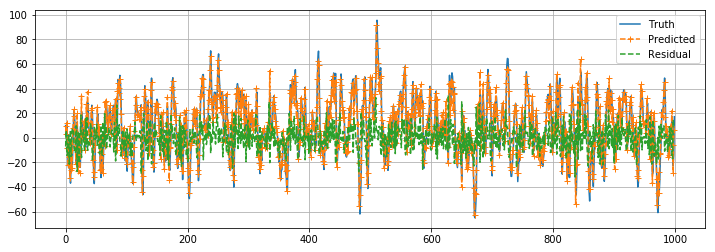

In [24]:
# Plot the residuals and test for their correlation
plt.figure(figsize=(12,4))
plt.plot(Yp)
plt.plot(model.fittedvalues, '--+')
plt.plot(model.resid, '--')
plt.grid()
plt.legend(['Truth', 'Predicted', 'Residual'])
plt.show()

## Residual analysis

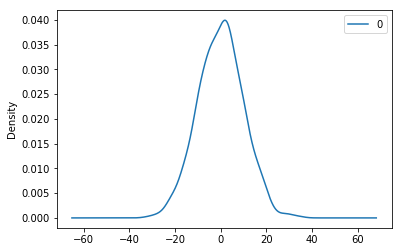

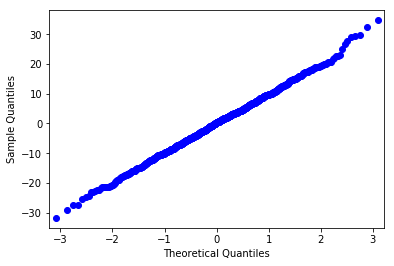

In [25]:
import pandas as pd
from statsmodels.api import qqplot

resid_df = pd.DataFrame(model.resid)
resid_df.plot(kind='kde')
qqplot(model.resid)
plt.show()

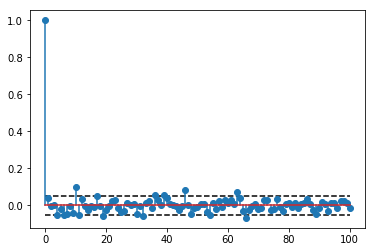

In [26]:
acf_res, qstat, pval = acf(model.resid, nlags=100, qstat=True)
plt.stem(acf_res,)
plt.hlines(0.05, 0,100, linestyle='dashed')
plt.hlines(-0.05, 0,100, linestyle='dashed')
plt.show()

## Forecasting

In [27]:
yhat, std_err, confint = model.forecast()
print ("Predicted value = {}, StdErr = {}, Confidence Interval = {}".format(yhat, std_err, confint))

Predicted value = [ 9408.72145745], StdErr = [ 9.91997041], Confidence Interval = [[ 9389.27867272  9428.16424217]]
